In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

# Description of the variables

Variable	                Description
Item_Identifier:            Unique product ID
Item_Weight:                Weight of product
Item_Fat_Content:           Whether the product is low fat or not
Item_Visibility:            The % of total display area of all products in a store allocated to the particular product
Item_Type:	                The category to which the product belongs
Item_MRP:	                Maximum Retail Price (list price) of the product
Outlet_Identifier:          Unique store ID
Outlet_Establishment_Year:	The year in which store was established
Outlet_Size:	            The size of the store in terms of ground area covered
Outlet_Location_Type:	    The type of city in which the store is located
Outlet_Type:	            Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales:	        Sales of the product in the particular store. This is the outcome variable to be predicted.

In [2]:
df_train=pd.read_csv("train_v9rqX0R.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# check the info of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#check the number of unique values the following variables contain:
#Item_Fat_Content
#Item_Type
#Outlet_Size
#Outlet_Location_Type
#Outlet_Type

df_train[['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']].nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [5]:
# Checking the types of item we have in our dataset
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [6]:
df_train['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [10]:
df_train['Item_Weight'].nunique()

415

In [11]:
df_train['Item_Weight'].dtype

dtype('float64')

In [12]:
#Checking for "NaN" in "Item_Weight" column
df_train[df_train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [13]:
# replacing "NaN" of the following columns with suitable measures so that the model designing can be done smoothly
# Item_Weight with "Mean of all other available values"
# Outlet_Type with "Median of all other available values"
df_train['Item_Weight']=df_train["Item_Weight"].replace('nan',np.nan)

In [14]:
df_train["Item_Weight"]=df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean())

In [15]:
df_train["Item_Weight"].mean()

12.857645184136409

In [16]:
df_train["Item_Weight"].isna().sum()

0

In [17]:
df_train["Item_Weight"].unique()

array([ 9.3       ,  5.92      , 17.5       , 19.2       ,  8.93      ,
       10.395     , 13.65      , 12.85764518, 16.2       , 11.8       ,
       18.5       , 15.1       , 17.6       , 16.35      ,  9.        ,
       13.35      , 18.85      , 14.6       , 13.85      , 13.        ,
        7.645     , 11.65      ,  5.925     , 19.25      , 18.6       ,
       18.7       , 17.85      , 10.        ,  8.85      ,  9.8       ,
       13.6       , 21.35      , 12.15      ,  6.42      , 19.6       ,
       15.85      ,  7.39      , 10.195     ,  9.895     , 10.895     ,
        7.905     ,  9.195     ,  8.365     ,  7.97      , 17.7       ,
       19.35      ,  8.645     , 15.6       , 18.25      ,  7.855     ,
        7.825     ,  8.39      , 12.85      , 19.        ,  5.905     ,
        7.76      , 16.75      , 15.5       ,  6.055     ,  6.305     ,
       20.85      , 20.75      ,  8.895     , 19.7       ,  8.75      ,
       13.3       ,  8.31      , 19.75      , 17.1       , 10.5 

In [18]:
#Checking for "NaN" values in "Outlet_Size" column
df_train[df_train["Outlet_Size"].isna()==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [19]:
df_train["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [20]:
df_train[df_train["Outlet_Size"].isna()== True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [21]:
df_train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [22]:
#Replacing the string "nan" with np.nan values
df_train["Outlet_Size"]=df_train['Outlet_Size'].replace("nan", np.nan)

In [23]:
#Replacing the missing values 
df_train["Outlet_Size"]=df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode().iat[0])

In [24]:
df_train["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
df_train["Outlet_Size"].mode().iat[0]

'Medium'

In [26]:
df_train["Item_Identifier"].nunique()

1559

In [27]:
#creating dummy variables out of "Item_Identifier" column
df_dum2=pd.get_dummies(df_train["Item_Identifier"])

In [28]:
df_train=pd.concat([df_train,df_dum2], axis=1)

In [29]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,0,0,0,0,0,0,0,0,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train['Outlet_Size'].isna().sum()

0

In [31]:
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace("Low_Fat", "low fat")

In [32]:
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace("LF", "low fat")

In [33]:
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace("reg", "Regular")

In [34]:
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace("low fat", "Low Fat")

In [35]:
#Finding out the unique values the column "Item_Fat_Content" contains
#label encoding the "Item_Fat_Content" column
df_train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df_train["Item_Fat_Content"])
le.classes_
df_train["Item_Fat_Content"]=le.transform(df_train["Item_Fat_Content"])
df_train["Item_Fat_Content"]

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int32

In [37]:
#Checking the datatypes of all the variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1571 entries, Item_Identifier to NCZ54
dtypes: float64(4), int32(1), int64(1), object(6), uint8(1559)
memory usage: 13.4+ MB


In [38]:
#checking out the number of unique values present in the column "Item_Type"
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [39]:
# creating dummy variables for the values present in the column "Item_Type"
df_dum=pd.get_dummies(df_train["Item_Type"],prefix="Item_Type")
df_dum

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# withConcatenating the original dataframe "df_train" and dummy dataframe "df_dum"
df_train=pd.concat([df_train,df_dum], axis=1)

In [41]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0,0,0,1,0,0,0,0,0,0


In [42]:
df_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [43]:
#Creating dummy variables out of "Outlet_Identifier" column
df_dum1=pd.get_dummies(df_train['Outlet_Identifier'], prefix="Outlet_Identity")

In [44]:
#concatenating "df_train" and "df_dum1" to get a consolidated dataframe
df_train=pd.concat([df_train,df_dum1], axis=1)

In [45]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Identity_OUT010,Outlet_Identity_OUT013,Outlet_Identity_OUT017,Outlet_Identity_OUT018,Outlet_Identity_OUT019,Outlet_Identity_OUT027,Outlet_Identity_OUT035,Outlet_Identity_OUT045,Outlet_Identity_OUT046,Outlet_Identity_OUT049
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0,1,0,0,0,0,0,0,0,0


In [46]:
df_train["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [181]:
#Label encoding the column "Outlet_Size"
le1=LabelEncoder()
le1.fit(df_train["Outlet_Size"])
le1.classes_
df_train["Outlet_Size"]=le1.transform(df_train["Outlet_Size"])
df_train["Outlet_Size"]

0       1
1       1
2       1
3       1
4       0
       ..
8518    0
8519    1
8520    2
8521    1
8522    2
Name: Outlet_Size, Length: 8523, dtype: int64

In [48]:
#Checking number of values available in "Outlet_Location_Type"
df_train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [49]:
# Label encoding the column "Outlet_Location_Type"
le2=LabelEncoder()
le2.fit(df_train["Outlet_Location_Type"])
le2.classes_
df_train["Outlet_Location_Type"]=le2.transform(df_train["Outlet_Location_Type"])
df_train['Outlet_Location_Type']

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int32

In [50]:
# Counting the unique values present in "Outlet_Type" column
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [51]:
#label Encoding the column "Outlet_Type"
le3=LabelEncoder()
le3.fit(df_train["Outlet_Type"])
le3.classes_
df_train["Outlet_Type"]=le3.transform(df_train["Outlet_Type"])
df_train['Outlet_Type']

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 8523, dtype: int32

In [52]:
#dropping the rendundant columns as these columns have already been converted using either label encoding or onehot encoding
df_train.drop(["Item_Type","Outlet_Identifier", "Item_Identifier"], axis=1, inplace=True)

In [53]:
#Checking the datatype of each columns 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1594 entries, Item_Weight to Outlet_Identity_OUT049
dtypes: float64(4), int32(4), int64(1), uint8(1585)
memory usage: 13.3 MB


In [199]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,DRA12,...,Outlet_Identity_OUT010,Outlet_Identity_OUT013,Outlet_Identity_OUT017,Outlet_Identity_OUT018,Outlet_Identity_OUT019,Outlet_Identity_OUT027,Outlet_Identity_OUT035,Outlet_Identity_OUT045,Outlet_Identity_OUT046,Outlet_Identity_OUT049
0,9.30,0,0.016047,249.8092,1,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,2,1,2,2,443.4228,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,1,0,1,2097.2700,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,1,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,0,2,1,994.7052,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
df_train.select_dtypes(include=['object'])

""
0
1
2
3
4
...
8518
8519
8520
8521


In [55]:
#Binning the column "Outlet_Establishment_Year" into interval of 10 years
df_train['Outlet_Establishment_Year']=pd.cut(df_train.Outlet_Establishment_Year, [1980,1990,2000,2010,2020], labels=['1980','1990','2000','2010'])
df_train['Outlet_Establishment_Year']

0       1990
1       2000
2       1990
3       1990
4       1980
        ... 
8518    1980
8519    2000
8520    2000
8521    2000
8522    1990
Name: Outlet_Establishment_Year, Length: 8523, dtype: category
Categories (4, object): ['1980' < '1990' < '2000' < '2010']

In [56]:
#lebel encoding the updated "Outlet_Establishment_Year"
le4=LabelEncoder()
le4.fit(df_train["Outlet_Establishment_Year"])
le4.classes_
df_train["Outlet_Establishment_Year"]=le4.transform(df_train["Outlet_Establishment_Year"])
df_train['Outlet_Establishment_Year']

0       1
1       2
2       1
3       1
4       0
       ..
8518    0
8519    2
8520    2
8521    2
8522    1
Name: Outlet_Establishment_Year, Length: 8523, dtype: int32

In [57]:
#Setting up X and y for modelling part
X=df_train.drop('Item_Outlet_Sales', axis=1)
y=df_train["Item_Outlet_Sales"]

In [58]:
#importing the required libraries and Packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
scaler=StandardScaler()

#Fit training data only
scaler.fit(X_train)

#Apply transform to both the training set and the test set
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [61]:
from sklearn.decomposition import PCA

#make an instance of of the model
pca=PCA(n_components=1200)

In [62]:
#fitting PCA on the training set only
pca.fit(X_train)
variance=pca.explained_variance_ratio_
print(sum(variance)*100)

77.90943169311542


In [63]:
#applying the the mapping(transform) to both the training and testing set 
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [64]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

In [65]:
y_test.head()

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

In [66]:
#implimenting Lasso regularisation 
reg=LassoCV()
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef=pd.Series(reg.coef_, index=X.columns)

Best alpha using built-in LassoCV: 60.310409
Best score using built-in LassoCV: 0.503395


In [67]:
print("Lasso picked " + str(sum(coef !=0)) + " variables and eliminated the other " + str(sum(coef==0)) + " variables")

Lasso picked 4 variables and eliminated the other 1589 variables


In [68]:
pd.options.display.max_rows =2000
coef[coef!=0]

Item_MRP                   15.564313
Outlet_Location_Type      -62.517056
Outlet_Type               836.740949
Outlet_Identity_OUT018   -286.683798
dtype: float64

In [69]:
#Implementing Ridge regularisation
#reg_ridge=RidgeCV()
#reg_ridge.fit(X,y)
#print("Best alpha using built-in RidgeCV: %f" %reg_ridge.)
#print("Best score using built-in RidgeCV: %f" %reg_ridge.score(X,y))
#coef=pd.Series(reg_ridge.coef_, index=X.columns)

In [70]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred=reg.predict(X)

In [72]:
df_train['Outlet_Establishment_Year'].unique()

array([1, 2, 0])

In [73]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#Predicting the target variable on the basis of training data
y_pred_train=reg.predict(X_train)

In [75]:
#evaluating the model on the basis training data (Training error)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_train=mean_absolute_error(y_train,y_pred_train)
mse_train=mean_squared_error(y_train,y_pred_train, squared=False)
r2_train=r2_score(y_train, y_pred_train)

In [76]:
#Training errors
print(mae_train)
print(mse_train)
print(r2_train)

794.7708796424048
1064.58896644587
0.6167794692215292


In [77]:
#cross valiadtion of the model
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(reg,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(reg,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_reg_test= cv_scores_test.mean()
cv_scores_reg_train= cv_scores_train.mean()
cv_scores_std_reg= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_reg_test))
print ('Mean cross validation train score: ' +str(cv_scores_reg_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_reg))

[-1.27529520e+26 -4.86493637e+26 -2.66692126e+24 -4.20471757e+26
 -7.43805782e+25]
Mean cross validation test score: -2.223084827454122e+26
Mean cross validation train score: 0.29065123571812507
Standard deviation in cv scores: 1.9399516033056536e+26


In [78]:
#binning the "Outlet_Establishment_Year" for training dataset
#year_bin_train=pd.cut(X_train['Outlet_Establishment_Year'],[1984, 1987, 1990, 1993, 1996, 1999, 2002, 2005,2008,2011])
#year_bin_train

In [79]:
# predicting the target variable
y_pred1=reg.predict(X_test)

In [80]:
#Testing error
mae_test=mean_absolute_error(y_test,y_pred1)
mse_test=mean_squared_error(y_test, y_pred1, squared=False)
r2_test=r2_score(y_test,y_pred1)

In [81]:
print(mae_test)
print(mse_test)
print(r2_test)

987.3934807666748
1333.2863931041006
0.36534926315552374


<AxesSubplot:xlabel='Item_Outlet_Sales'>

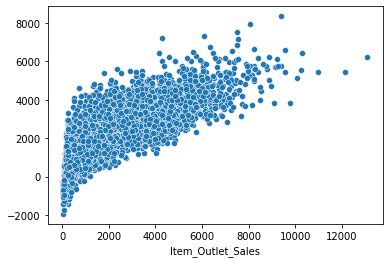

In [82]:
#Import Plotly lib 
sns.scatterplot(y_train, y_pred_train, x_bins= 12)

In [83]:
# note: residual analysis in Regression ()
#Bucketising the actual values and try out a scatter plot
# lasso and Ridge reularisation for train and test data

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Outlet_Sales'>

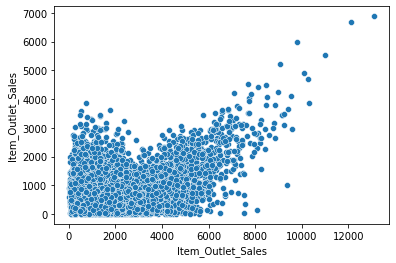

In [84]:
sns.scatterplot(y_train, np.abs(y_train - y_pred_train))

<AxesSubplot:xlabel='Item_Outlet_Sales'>

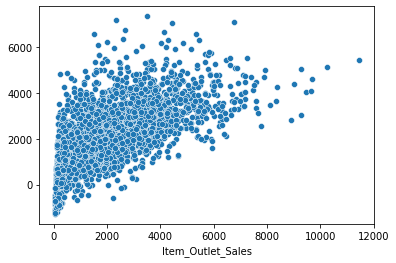

In [85]:
sns.scatterplot(y_test, y_pred1)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Outlet_Sales'>

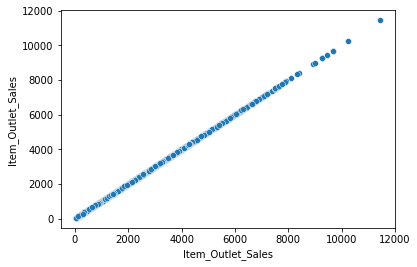

In [86]:
sns.scatterplot(y_test, np.abs(y_test, y_pred1))

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
mae=mean_absolute_error(y, y_pred)
mse=mean_squared_error(y, y_pred)
rmse=mean_squared_error(y, y_pred, squared = False)
r2=r2_score(y,y_pred)

In [88]:
print(mae)
print(mse)
print(rmse)
print(r2)


760.8679169453244
1038572.0770403269
1019.1035654143925
0.6433229131078109


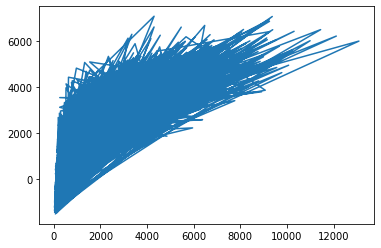

In [89]:
#plotting the graph showing 
plt.plot(y, y_pred)

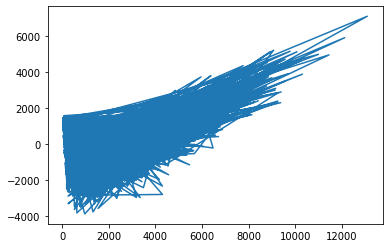

In [90]:
plt.plot(y, (y-y_pred))

In [91]:
#adjusted R^2 calculation
adj_r2 = (1 - (1 - r2) * ((df_train.shape[0] - 1) / 
          (df_train.shape[0] - df_train.shape[1] - 1)))
print(adj_r2)

0.5612583524111958


In [92]:
#mean absolute percentage error, symmetric mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [93]:
mean_absolute_percentage_error(y, y_pred)

0.9595626760803184

In [94]:
#symmetric mean absolute percentage error function definition 
def symmetric_mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/((y_true + y_pred)/2)))

In [95]:
symmetric_mean_absolute_percentage_error(y, y_pred)

1.3111373271831381

In [96]:
#Execution of decisiontree regressor 
from sklearn.tree import DecisionTreeRegressor
reg_dt=DecisionTreeRegressor()
reg_dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
y_pred_dt=reg_dt.predict(X_test)

In [98]:
df_dt=pd.DataFrame({"Actual": y_test, "Predicted": y_pred_dt})
df_dt

,Actual,Predicted
7503,1743.0644,850.8924
2957,356.8688,2111.2518
7031,377.5086,611.2044
1084,5778.4782,1926.1594
856,2356.9320,4958.8784
...,...,...
443,2133.2232,1303.6364
777,4287.7520,2460.7968
1119,767.0016,282.2992
3209,642.4970,2708.4744


In [99]:
#import metrics module 
from sklearn import metrics

In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

Mean Absolute Error: 1269.2025363316386
Mean Squared Error: 3146440.1261742213
Root Mean Squared Error: 1773.8207705893574


In [101]:
#excecuting random forest
from sklearn.ensemble import RandomForestRegressor

In [104]:
RandomForestRegressor?

In [105]:
%%time
reg_rf=RandomForestRegressor(n_estimators=50,verbose=3)
reg_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=3, warm_start=False)

In [106]:
#predicting on the basis of X_train values (trying to predict y_train for analysis)
y_pred_rf_train=reg_rf.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [107]:
y_pred_rf=reg_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [108]:
#comparing the predicted values with the actual values
df_rf=pd.DataFrame({"Actual value": y_test, "Predicted values": y_pred_rf})
df_rf

,Actual value,Predicted values
7503,1743.0644,1295.873172
2957,356.8688,1207.255192
7031,377.5086,800.318232
1084,5778.4782,3237.119600
856,2356.9320,2139.095556
...,...,...
443,2133.2232,1720.653572
777,4287.7520,3421.945680
1119,767.0016,1612.714076
3209,642.4970,2115.792556


In [109]:
df_rf.mean()

Actual value        2126.240242
Predicted values    2205.370856
dtype: float64

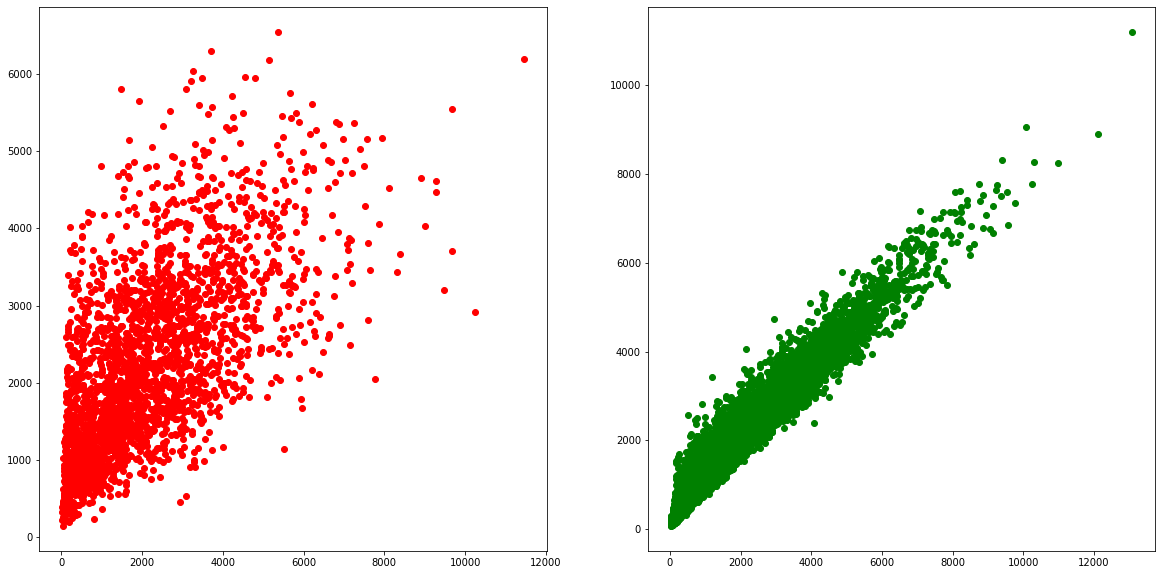

In [110]:
#visualising the Random Forest regression result
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, color= "red")
plt.subplot(1,2,2)
plt.scatter(y_train, y_pred_rf_train, color= "green")

In [111]:
#Evaluating the Random Forest model
mae_rf=mean_absolute_error(y_test, y_pred_rf)
rmse_rf=mean_squared_error(y_test, y_pred_rf, squared = False)
r2_score_rf=r2_score(y_test, y_pred_rf)

In [112]:
print("Mean absolute error: ", mae_rf)
print("Root Mean Squared error: ", rmse_rf)
print("R^2 score: ", r2_score_rf)

Mean absolute error:  956.501616830661
Root Mean Squared error:  1284.7269437206953
R^2 score:  0.4107364748262271


In [113]:
#adjusted R^2 calculation
adj_r2_rf = (1 - (1 - r2_score_rf) * ((df_train.shape[0] - 1) / 
          (df_train.shape[0] - df_train.shape[1] - 1)))
print(adj_r2_rf)

0.27515823303537934


In [114]:
%%time
#cross valiadtion of the model
cv_scores_test= cross_val_score(reg_rf,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(reg_rf,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [115]:
#execution of KNN regressor
from sklearn.neighbors import KNeighborsRegressor

In [117]:
#Fiting the model to the training data
reg_knn=KNeighborsRegressor(n_neighbors=6, weights='distance')
reg_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='distance')

In [120]:
%%time
y_pred_knn=reg_knn.predict(X_test)

Wall time: 33 s


In [121]:
df_knn=pd.DataFrame({"Actual value": y_test, "Predicted values": y_pred_knn})
df_knn

,Actual value,Predicted values
7503,1743.0644,1129.946021
2957,356.8688,1424.817183
7031,377.5086,355.880576
1084,5778.4782,2332.855099
856,2356.9320,1853.139728
...,...,...
443,2133.2232,2162.692012
777,4287.7520,3179.941566
1119,767.0016,2773.044304
3209,642.4970,1050.090000


In [122]:
#evaluation of the KNN model
mae_knn=mean_absolute_error(y_test, y_pred_knn)
rmse_knn=mean_squared_error(y_test, y_pred_knn, squared = False)
r2_score_knn=r2_score(y_test, y_pred_knn)

In [123]:
print("Mean absolute error: ", mae_knn)
print("Root Mean Squared error: ", rmse_knn)
print("R^2 score: ", r2_score_knn)

Mean absolute error:  1147.9566879438735
Root Mean Squared error:  1551.9693236809765
R^2 score:  0.14008770169643237


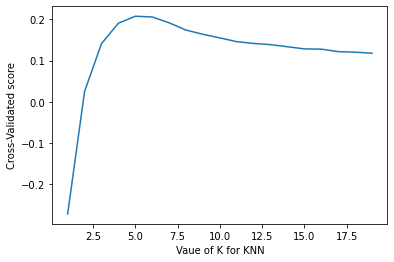

In [124]:
# choosing the best k for the model (KNN)
# choose k between 1 till 20
from sklearn.model_selection import cross_val_score
k_range=range(1,20)
k_score = []

for k in k_range:
    knn=KNeighborsRegressor(n_neighbors=k)
    scores=cross_val_score(knn, X_train, y_train, cv=5)
    k_score.append(scores.mean())
#plot to see which k performs the best
plt.plot(k_range, k_score)
plt.xlabel("Vaue of K for KNN")
plt.ylabel("Cross-Validated score")
plt.show()

In [ ]:
# we can see that the best value of K lies around 6

In [127]:
%%time
cv_scores_test= cross_val_score(reg_knn,X_test,y_test,cv=5, verbose=3)
cv_scores_train= cross_val_score(reg_knn,X_train,y_train,cv=5, verbose=3)
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.084, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .................................... , score=0.109, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] .................................... , score=0.113, total=   3.1s
[CV]  ................................................................
[CV] .................................... , score=0.056, total=   3.1s
[CV]  ................................................................
[CV] .................................... , score=0.061, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.155, total=  15.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s


[CV] .................................... , score=0.102, total=  15.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.1s remaining:    0.0s


[CV] .................................... , score=0.080, total=  15.1s
[CV]  ................................................................
[CV] .................................... , score=0.120, total=  15.1s
[CV]  ................................................................
[CV] .................................... , score=0.101, total=  15.1s
[0.08375995 0.10886151 0.11345317 0.05613297 0.06083657]
Mean cross validation test score: 0.08460883152720826
Mean cross validation train score: 0.11162706151857571
Standard deviation in cv scores: 0.023651232986692042
Wall time: 1min 31s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [128]:
# Execution of Support Vector Machine (SVM) model
from sklearn.svm import SVR
reg_svm=SVR(kernel='rbf')
reg_svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [129]:
#pedicting the target variable using the test features
y_pred_svm=reg_svm.predict(X_test)

In [130]:
#Evaluating the model
df_svm=pd.DataFrame({"Actual value": y_test, "Predicted values": y_pred_svm})
df_svm

,Actual value,Predicted values
7503,1743.0644,1807.104425
2957,356.8688,1808.163270
7031,377.5086,1803.814625
1084,5778.4782,1811.711224
856,2356.9320,1810.123374
...,...,...
443,2133.2232,1809.055409
777,4287.7520,1811.993721
1119,767.0016,1812.000667
3209,642.4970,1808.945665


In [131]:
mae_svm=mean_absolute_error(y_test, y_pred_svm)
rmse_svm=mean_squared_error(y_test, y_pred_svm, squared = False)
r2_score_svm=r2_score(y_test, y_pred_svm)

In [132]:
print("Mean absolute error: ", mae_svm)
print("Root Mean Squared error: ", rmse_svm)
print("R^2 score: ", r2_score_svm)

Mean absolute error:  1291.5950006162307
Root Mean Squared error:  1701.6932377937364
R^2 score:  -0.033833119307765


In [133]:
#cross validation of the model
cv_scores_test= cross_val_score(reg_svm,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(reg_svm,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[-0.04087905 -0.05166014 -0.03313708 -0.03026776 -0.1030839 ]
Mean cross validation test score: -0.05180558457088909
Mean cross validation train score: -0.052349857403126164
Standard deviation in cv scores: 0.026688075246270287


In [136]:
#Gradiant boosting
from sklearn.ensemble import GradientBoostingRegressor
reg_gb=GradientBoostingRegressor(n_estimators=70, verbose=3)
reg_gb.fit(X_train,y_train)
y_pred_gb=reg_gb.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1     2778107.9483            2.17m
         2     2630157.1726            2.14m
         3     2499356.9895            2.11m
         4     2390846.7426            2.07m
         5     2295045.5121            2.04m
         6     2208973.2046            2.02m
         7     2125738.2050            1.99m
         8     2060005.4155            1.96m
         9     1998416.8708            1.93m
        10     1945349.6929            1.90m
        11     1894721.6350            1.87m
        12     1837502.8077            1.84m
        13     1797000.1588            1.81m
        14     1761101.7192            1.78m
        15     1719529.4885            1.75m
        16     1686515.0140            1.72m
        17     1644128.6270            1.69m
        18     1617869.9585            1.65m
        19     1589515.6395            1.63m
        20     1557076.7837            1.59m
        21     1533370.8827            1.56m
        2

In [137]:
#evaluation of the model
mae_gb=mean_absolute_error(y_test, y_pred_gb)
rmse_gb=mean_squared_error(y_test, y_pred_gb, squared = False)
r2_score_gb=r2_score(y_test, y_pred_gb)

In [138]:
print("Mean absolute error: ", mae_gb)
print("Root Mean Squared error: ", rmse_gb)
print("R^2 score: ", r2_score_gb)

Mean absolute error:  898.2902021309333
Root Mean Squared error:  1201.5739114527912
R^2 score:  0.4845472327656478


In [139]:
print(reg_gb.score(X_test, y_test))

0.4845472327656478


In [140]:
#Cross validation evaluation
cv_scores_test= cross_val_score(reg_gb,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(reg_gb,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_gb_test= cv_scores_test.mean()
cv_scores_gb_train= cv_scores_train.mean()
cv_scores_std_gb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gb_test))
print ('Mean cross validation train score: ' +str(cv_scores_gb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gb))

      Iter       Train Loss   Remaining Time 
         1     2637696.2284           41.35s
         2     2490100.1025           40.70s
         3     2366152.6806           40.15s
         4     2261732.4722           39.46s
         5     2171850.7070           38.90s
         6     2084949.2973           38.40s
         7     2007622.1541           37.95s
         8     1948086.8059           37.42s
         9     1880294.4073           37.03s
        10     1822050.5465           36.61s
        11     1771657.4629           36.16s
        12     1729355.1275           35.58s
        13     1685996.6133           34.97s
        14     1637522.8414           34.48s
        15     1594014.3115           34.06s
        16     1556562.0195           33.69s
        17     1518245.6796           33.25s
        18     1484811.7896           32.59s
        19     1453239.9832           31.96s
        20     1426220.1029           31.29s
        21     1399068.1310           30.66s
        2

        40     1114329.2135           18.85s
        41     1105526.7472           18.23s
        42     1099322.3283           17.62s
        43     1093853.8791           17.01s
        44     1078293.5623           16.37s
        45     1067248.6441           15.73s
        46     1056607.6796           15.09s
        47     1050488.7059           14.48s
        48     1041031.4004           13.85s
        49     1036574.3751           13.23s
        50     1029142.8082           12.61s
        51     1019724.5098           11.98s
        52     1012618.2877           11.35s
        53     1008462.8385           10.73s
        54      999052.3501           10.10s
        55      992602.0261            9.47s
        56      981869.7417            8.84s
        57      975807.6385            8.21s
        58      964525.0107            7.57s
        59      958166.0452            6.94s
        60      951996.6791            6.31s
        61      948232.8889            5.69s
        62

         9     1999781.0582            1.53m
        10     1943611.6882            1.50m
        11     1894290.4558            1.48m
        12     1846090.3749            1.46m
        13     1795110.6128            1.43m
        14     1759323.0530            1.41m
        15     1725284.6890            1.39m
        16     1681278.5308            1.36m
        17     1649882.8899            1.34m
        18     1621216.9171            1.31m
        19     1596548.3163            1.29m
        20     1568307.1762            1.26m
        21     1538105.5043            1.24m
        22     1509824.2889            1.22m
        23     1487604.4507            1.19m
        24     1467341.0572            1.17m
        25     1450572.3464            1.14m
        26     1431682.7880            1.12m
        27     1415635.1902            1.09m
        28     1398787.3138            1.07m
        29     1386436.2383            1.04m
        30     1372674.3674            1.02m
        31

        50     1154508.1965           30.75s
        51     1147529.5779           29.20s
        52     1142397.3435           27.67s
        53     1136001.1134           26.13s
        54     1128405.9565           24.59s
        55     1121527.9105           23.06s
        56     1118077.4285           21.53s
        57     1114138.8424           20.00s
        58     1107820.7058           18.46s
        59     1105562.0296           16.93s
        60     1099574.9799           15.39s
        61     1095038.9261           13.84s
        62     1090324.7904           12.31s
        63     1086006.0684           10.77s
        64     1082695.9554            9.24s
        65     1076280.9334            7.70s
        66     1072588.4995            6.16s
        67     1069824.0018            4.62s
        68     1063865.6143            3.08s
        69     1060999.8799            1.54s
        70     1057999.7003            0.00s
      Iter       Train Loss   Remaining Time 
         

In [141]:
#Execution of Gradian Boosting using xgboost
import xgboost as xg

In [142]:
#instantiate XGBRegressor
reg_xgb=xg.XGBRegressor(objective='reg:linear')

#fitting the model 
reg_xgb.fit(X_train,y_train)

[22:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [144]:
#prediction using the model
y_pred_xgb=reg_xgb.predict(X_test)

In [145]:
#evaluation of the model
mae_xgb=mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb=mean_squared_error(y_test, y_pred_xgb, squared = False)
r2_score_xgb=r2_score(y_test, y_pred_xgb)

In [146]:
print("Mean absolute error: ", mae_xgb)
print("Root Mean Squared error: ", rmse_xgb)
print("R^2 score: ", r2_score_xgb)

Mean absolute error:  922.5231720815032
Root Mean Squared error:  1263.7067113000978
R^2 score:  0.4298613557706942


In [147]:
%%time
cv_scores_test= cross_val_score(reg_xgb,X_test,y_test,cv=5, verbose=3) # what should be the value of scoring parameter?
cv_scores_train= cross_val_score(reg_xgb,X_train,y_train,cv=5, verbose=3)   # what should be the value of  scoring parameter?
print(cv_scores_test)
cv_scores_xgb_test= cv_scores_test.mean()
cv_scores_xgb_train= cv_scores_train.mean()
cv_scores_std_xgb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_xgb_test))
print ('Mean cross validation train score: ' +str(cv_scores_xgb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_xgb))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[10:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................................... , score=0.401, total=  14.3s
[CV]  ................................................................
[10:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV] .................................... , score=0.468, total=  15.2s
[CV]  ................................................................
[10:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.3s remaining:    0.0s


[CV] .................................... , score=0.347, total=  15.6s
[CV]  ................................................................
[10:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................................... , score=0.364, total=  15.4s
[CV]  ................................................................
[10:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................................... , score=0.352, total=  15.4s
[CV]  ................................................................
[10:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.477, total=  35.3s
[CV]  ................................................................
[10:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.3s remaining:    0.0s


[CV] .................................... , score=0.468, total=  37.2s
[CV]  ................................................................
[10:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] .................................... , score=0.411, total=  38.4s
[CV]  ................................................................
[10:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................................... , score=0.485, total=  37.1s
[CV]  ................................................................
[10:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................................... , score=0.433, total=  38.1s
[0.4009753  0.46802258 0.34664338 0.364117   0.35200822]
Mean cross validation test score: 0.38635329412534414
Mean cross validation train score: 0.4547443954086378
Standard deviation in cv scores: 0.04502130389672374
Wall time: 4min 22s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished


In [148]:
#Comparison of the model
mylabels = ["KNN", "SVM", "Random Forest", "Gradient Boost", "XG Boost"]
score_test=[cv_scores_knn_test, cv_scores_svm_test, cv_scores_rf_test, cv_scores_gb_test, cv_scores_xgb_test]
score_train=[cv_scores_knn_train, cv_scores_svm_train, cv_scores_rf_test, cv_scores_gb_train, cv_scores_xgb_train]
rmse_score= [rmse_knn, rmse_rf, rmse_svm, rmse_gb, rmse_xgb]

#Displaying the table containg rmse of different models created
score_tab_rmse=pd.DataFrame(list(zip(mylabels, rmse_score)), columns = ["Algorithm", "Model RMSE Score"])

#Display table for training and test scores of different model
score_tab = pd.DataFrame(list(zip(mylabels, score_train, score_test)), columns = ["Algorithm", "Train Score", "Test Score"])
print(score_tab_rmse)
print(score_tab)

        Algorithm  Model RMSE Score
0             KNN       1551.969324
1             SVM       1284.726944
2   Random Forest       1701.693238
3  Gradient Boost       1201.573911
4        XG Boost       1263.706711
        Algorithm  Train Score  Test Score
0             KNN     0.111627    0.084609
1             SVM    -0.052350   -0.051806
2   Random Forest     0.384485    0.384485
3  Gradient Boost     0.522090    0.466011
4        XG Boost     0.454744    0.386353


## Applying Grid search CV for hyperparameter Tuning

In [ ]:
#from sklearn.model_selection import GridSearchCV
#rf = RandomForestRegressor(max_features='auto', random_state=1)
#param_grid={"min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12], "n_estimators": [50, 70,120,150]}
#gs=GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=2)
#gs=gs.fit(X_train,y_train)
#print(gs.best_estimator_)
#print(gs.best_score_)

In [ ]:
#metrics.SCORERS.keys()

## Applying the models to the test data for prediction

In [246]:
#load the test data
df_test=pd.read_csv("test_AbJTz2l.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [247]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [248]:
df_test[['Item_Identifier','Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type', "Item_Visibility"]].nunique()

Item_Identifier         1543
Item_Fat_Content           5
Item_Type                 16
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Visibility         5277
dtype: int64

In [249]:
#Checking for "NaN" in "Item_Weight" column
#df_test[df_test['Item_Weight'].isna()]

In [250]:
# replacing "NaN" of the following columns with suitable measures so that the model designing can be done smoothly
# Item_Weight with "Mean of all other available values"
# Outlet_Type with "Median of all other available values"
df_test['Item_Weight']=df_test["Item_Weight"].replace('nan',np.nan)

In [251]:
df_test["Item_Weight"]=df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean())

In [252]:
df_test["Item_Weight"].mean()

12.695633368756402

In [253]:
df_test["Item_Weight"].isna().sum()

0

In [254]:
#creating dummy variables out of "Item_Identifier" column
df_dum_item_ident=pd.get_dummies(df_test["Item_Identifier"])

In [255]:
df_test=pd.concat([df_test,df_dum_item_ident], axis=1)

In [256]:
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace("Low_Fat", "low fat")

In [257]:
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace("LF", "low fat")

In [258]:
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace("reg", "Regular")

In [259]:
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace("low fat", "Low Fat")

In [260]:
#Finding out the unique values the column "Item_Fat_Content" contains
#label encoding the "Item_Fat_Content" column
df_test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [261]:
#label encoding 
le=LabelEncoder()
le.fit(df_test["Item_Fat_Content"])
le.classes_
df_test["Item_Fat_Content"]=le.transform(df_test["Item_Fat_Content"])
df_test["Item_Fat_Content"]

0       0
1       1
2       0
3       0
4       1
       ..
5676    1
5677    1
5678    0
5679    1
5680    1
Name: Item_Fat_Content, Length: 5681, dtype: int32

In [262]:
# creating dummy variables for the values present in the column "Item_Type"
df_dum_test=pd.get_dummies(df_test["Item_Type"],prefix="Item_Type")
df_dum_test

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5679,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [263]:
# withConcatenating the original dataframe "df_test" and dummy dataframe "df_dum_test"
df_test=pd.concat([df_test,df_dum_test], axis=1)

In [264]:
#Checing the test dataframe after cncatenatination
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,1,0,0
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,...,0,0,0,0,0,0,0,0,0,0
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,...,0,0,0,0,0,1,0,0,0,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,...,0,0,0,0,0,0,0,0,0,0


In [265]:
#Creating dummy variables out of "Outlet_Identifier" column
df_dum_outlet_ident=pd.get_dummies(df_test['Outlet_Identifier'], prefix="Outlet_Identity")

In [266]:
# with Concatenating the original dataframe "df_test" and dummy dataframe "df_dum_outlet_ident"
df_test=pd.concat([df_test,df_dum_outlet_ident], axis=1)
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Identity_OUT010,Outlet_Identity_OUT013,Outlet_Identity_OUT017,Outlet_Identity_OUT018,Outlet_Identity_OUT019,Outlet_Identity_OUT027,Outlet_Identity_OUT035,Outlet_Identity_OUT045,Outlet_Identity_OUT046,Outlet_Identity_OUT049
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,...,0,0,0,0,0,1,0,0,0,0


In [267]:
#Replacing the string "nan" with np.nan values
df_test["Outlet_Size"]=df_test['Outlet_Size'].replace("nan", np.nan)

In [268]:
#Replacing the missing values 
df_test["Outlet_Size"]=df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode().iat[0])

In [269]:
#Label encoding the column "Outlet_Size"
le_outletsize=LabelEncoder()
le_outletsize.fit(df_test["Outlet_Size"])
le_outletsize.classes_
df_test["Outlet_Size"]=le_outletsize.transform(df_test["Outlet_Size"])
df_test["Outlet_Size"]

0       1
1       1
2       1
3       1
4       1
       ..
5676    2
5677    1
5678    1
5679    1
5680    1
Name: Outlet_Size, Length: 5681, dtype: int32

In [270]:
#Label encoding the column "Outlet_Location_Type"
le_location_type=LabelEncoder()
le_location_type.fit(df_test["Outlet_Location_Type"])
le_location_type.classes_
df_test["Outlet_Location_Type"]=le_location_type.transform(df_test["Outlet_Location_Type"])
df_test["Outlet_Location_Type"]

0       0
1       1
2       2
3       1
4       2
       ..
5676    0
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Location_Type, Length: 5681, dtype: int32

In [271]:
#label Encoding the column "Outlet_Type"
le_outlet_type=LabelEncoder()
df_test["Outlet_Type"]=le_outlet_type.fit_transform(df_test["Outlet_Type"])
#le3.classes_
#df_train["Outlet_Type"]=le3.transform(df_train["Outlet_Type"])
df_test['Outlet_Type']

0       1
1       1
2       0
3       1
4       3
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Type, Length: 5681, dtype: int32

In [272]:
#dropping the rendundant columns as these columns have already been converted using either label encoding or onehot encoding
df_test.drop(["Item_Type","Outlet_Identifier", "Item_Identifier"], axis=1, inplace=True)

In [273]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,DRA12,DRA24,...,Outlet_Identity_OUT010,Outlet_Identity_OUT013,Outlet_Identity_OUT017,Outlet_Identity_OUT018,Outlet_Identity_OUT019,Outlet_Identity_OUT027,Outlet_Identity_OUT035,Outlet_Identity_OUT045,Outlet_Identity_OUT046,Outlet_Identity_OUT049
0,20.750000,0,0.007565,107.8622,1999,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,1,0.038428,87.3198,2007,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,1998,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0,0.015388,155.0340,2007,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12.695633,1,0.118599,234.2300,1985,1,2,3,0,0,...,0,0,0,0,0,1,0,0,0,0


In [274]:
#Binning the column "Outlet_Establishment_Year" into interval of 10 years
df_test['Outlet_Establishment_Year']=pd.cut(df_test.Outlet_Establishment_Year, [1980,1990,2000,2010,2020], labels=['1980','1990','2000','2010'])
df_test['Outlet_Establishment_Year']

0       1990
1       2000
2       1990
3       2000
4       1980
        ... 
5676    1990
5677    2000
5678    2000
5679    2000
5680    2000
Name: Outlet_Establishment_Year, Length: 5681, dtype: category
Categories (4, object): ['1980' < '1990' < '2000' < '2010']

In [275]:
#lebel encoding the updated "Outlet_Establishment_Year"
le_year=LabelEncoder()
df_test['Outlet_Establishment_Year']=le_year.fit_transform(df_test["Outlet_Establishment_Year"])
#le4.classes_
#df_train["Outlet_Establishment_Year"]=le4.transform(df_train["Outlet_Establishment_Year"])
df_test['Outlet_Establishment_Year']

0       1
1       2
2       1
3       2
4       0
       ..
5676    1
5677    2
5678    2
5679    2
5680    2
Name: Outlet_Establishment_Year, Length: 5681, dtype: int32

In [276]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Columns: 1577 entries, Item_Weight to Outlet_Identity_OUT049
dtypes: float64(3), int32(5), uint8(1569)
memory usage: 8.7 MB


In [277]:
scaler=StandardScaler()
scaler.fit(df_test)
#Apply transform test set
X_test1= scaler.transform(df_test)

In [243]:
#applying the the mapping(transform) to testing set 
X_test1=pca.transform(X_test1)

ValueError: operands could not be broadcast together with shapes (5681,1577) (1593,) 